<a href="https://colab.research.google.com/github/robo0803/Lecture_Python/blob/master/220516_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

In [2]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
path = '/content/sample_data/Fish.csv'
fish = pd.read_csv(path)
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
fish_input =  fish[['Weight','Length2','Length3','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
fish_target = fish['Species'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target, test_target = train_test_split(fish_input,fish_target)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8739495798319328
0.7


In [11]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
kn.predict(test_scaled[:5])

array(['Perch', 'Parkki', 'Roach', 'Perch', 'Perch'], dtype=object)

In [13]:
print(test_target[:5])

['Perch' 'Parkki' 'Roach' 'Perch' 'Perch']


In [15]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))

[[0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.6667 0.     0.     0.3333 0.     0.    ]
 [0.     0.     0.3333 0.     0.6667 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [16]:
print(test_scaled[3])
print(test_scaled[3:4])

[-0.72912926 -0.55673483 -0.63488114 -0.89354657 -0.5149811 ]
[[-0.72912926 -0.55673483 -0.63488114 -0.89354657 -0.5149811 ]]


In [18]:
_,indexes = kn.kneighbors(test_scaled[3:4]) # [3]: 원소가 됨 / test_scaled[3:4]해야 2차원배열형태가 됨
print(train_target[indexes])

[['Perch' 'Perch' 'Roach']]


In [19]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [25]:
xs = [x for x in np.arange(-4,4,0.1)]
ys = [sigmoid(x) for x in xs]

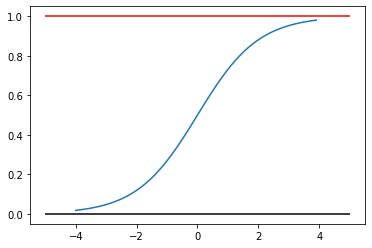

In [26]:
import matplotlib.pyplot as plt
plt.plot(xs,ys)
#plt.vlines(0,-2,2)
plt.hlines(0,-5,5)
plt.hlines(1,-5,5, colors = 'r')
plt.show()

In [29]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
bream_smelt_indexes2 = (test_target == 'Bream') | (test_target == 'Smelt')
test_bream_smelt = test_scaled[bream_smelt_indexes2]
test_target_bream_smelt = test_target[bream_smelt_indexes2]

In [30]:
#모델생성, 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)


LogisticRegression()

In [31]:
lr.predict(test_bream_smelt)

array(['Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Bream',
       'Smelt'], dtype=object)

In [32]:
print(test_target_bream_smelt)

['Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt']


In [33]:
print(lr.classes_) #로지스틱 회귀의 분류 결과 

['Bream' 'Smelt']


In [34]:
print(lr.coef_,lr.intercept_)

[[-0.43909798 -0.63069542 -0.71983729 -1.04039751 -0.80155599]] [-2.35711085]


In [35]:
decisions = lr.decision_function(test_bream_smelt[:5])
print(decisions)

[-2.92547669 -7.87717546 -7.72397277 -5.06942943  3.51623116]


In [37]:
for d in decisions:
  print(f'{sigmoid(d):.2f}',end='')

0.050.000.000.010.97

In [38]:
res = lr.predict(test_bream_smelt[:5])
print(res)

['Bream' 'Bream' 'Bream' 'Bream' 'Smelt']


로지스틱 회귀를 이용한 다중 분류

소프트 맥스

각각 확률 더한 값을 전체 확률로 나누면 항상 1이다.

In [40]:
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled, test_target))

0.7983193277310925
0.65


In [41]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Roach' 'Perch' 'Perch' 'Perch']


In [42]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

[[0.016 0.043 0.558 0.033 0.295 0.016 0.04 ]
 [0.096 0.218 0.227 0.01  0.351 0.061 0.037]
 [0.032 0.052 0.541 0.024 0.292 0.008 0.051]
 [0.006 0.028 0.633 0.03  0.249 0.025 0.029]
 [0.026 0.024 0.671 0.051 0.172 0.002 0.054]]


In [43]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [44]:
print(lr.coef_) # 선형함수 출력 n번째어종에 관한 가중치들이 []안에 있는것. 그렇게 7개 어종 출력됨

[[-0.10705009 -0.14344022  0.620984    2.96379405 -0.36942088]
 [-0.23951398 -0.46622069 -0.4484567   1.34218102 -0.42630991]
 [ 1.25389469  0.26531941 -1.36828371 -1.53786365  1.6119112 ]
 [-0.0496109   1.71743825  1.72328105 -1.28104523 -0.68995687]
 [-0.76080917 -0.56033746  0.2474592  -0.29206487  0.57094385]
 [-0.3838873  -0.76582785 -0.76743187 -1.25711856 -1.63217402]
 [ 0.28697675 -0.04693144 -0.00755197  0.06211723  0.93500663]]


In [45]:
print(lr.intercept_) # 편향 

[ 0.60035686 -0.28078118  2.23145353  0.06007716  0.9733978  -3.79972713
  0.21522296]


In [47]:
decision = lr.decision_function(test_scaled[:5]) #첫번째 원소에 관한 선형회귀함수값들...?
print(np.round(decision,decimals=2))

[[-1.31 -0.31  2.26 -0.57  1.62 -1.3  -0.38]
 [ 0.1   0.92  0.97 -2.19  1.4  -0.35 -0.85]
 [-0.63 -0.14  2.21 -0.89  1.59 -1.99 -0.16]
 [-2.09 -0.54  2.58 -0.45  1.65 -0.64 -0.5 ]
 [-0.53 -0.62  2.71  0.14  1.35 -3.21  0.18]]


In [48]:
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.016 0.043 0.558 0.033 0.295 0.016 0.04 ]
 [0.096 0.218 0.227 0.01  0.351 0.061 0.037]
 [0.032 0.052 0.541 0.024 0.292 0.008 0.051]
 [0.006 0.028 0.633 0.03  0.249 0.025 0.029]
 [0.026 0.024 0.671 0.051 0.172 0.002 0.054]]


## 확률적 경사하강법 모델

p.199

In [49]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier()
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8067226890756303
0.825


In [50]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.8403361344537815
0.825


In [60]:
import numpy as np
sc = SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [61]:
for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes) 
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

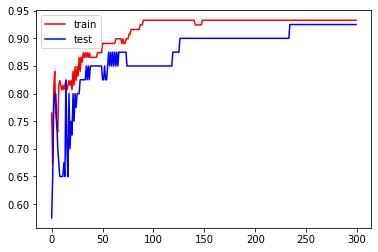

In [62]:
plt.plot(train_score,'r',label='train')
plt.plot(test_score,'b',label = 'test')
plt.legend()
plt.show()

결정트리 p.220

In [64]:
path = '/content/sample_data/wine2.csv'
wine = pd.read_csv(path)
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [65]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [66]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [67]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
data.shape, target.shape

((6497, 3), (6497,))

In [68]:
train_input,test_input,train_target, test_target = train_test_split(data,target,test_size=0.2)
train_input.shape,test_input.shape

((5197, 3), (1300, 3))

In [72]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [73]:
# train_scaled = train_input #스케일 조절 하지 않았는데 한 것처럼 변수만 바꾼것!
# test_scaled = test_input

In [74]:
lr = LogisticRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_scaled, test_target))

0.774485279969213
0.7623076923076924


In [75]:
print(lr.coef_,lr.intercept_)

[[ 0.44596348  0.34337401 -4.17411422]] [8.64686203]


In [76]:
# scaled되면서 (0,1)로 정규화됨
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.coef_,lr.intercept_) # sugar가 가장 큰 영향을 미치는 것 확인

0.7769867231094862
0.7984615384615384
[[ 0.53757676  1.62757579 -0.70787149]] [1.76308434]


In [77]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.9978833942659227
0.8807692307692307


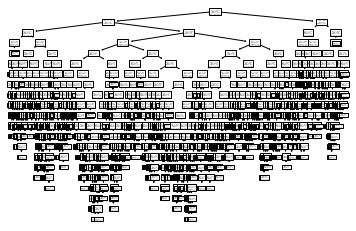

In [79]:
from sklearn.tree import plot_tree
plot_tree(dt)
plt.show()

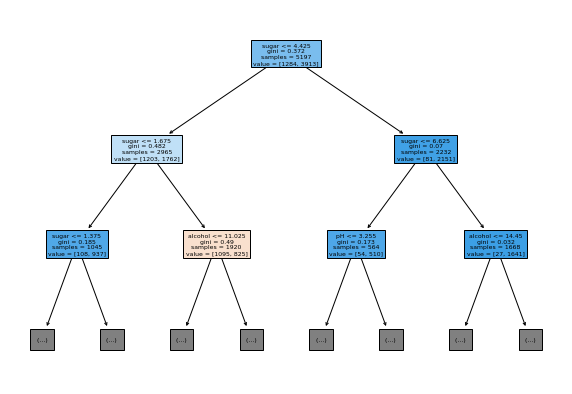

In [81]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=2,filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [82]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8422166634596883
0.8515384615384616


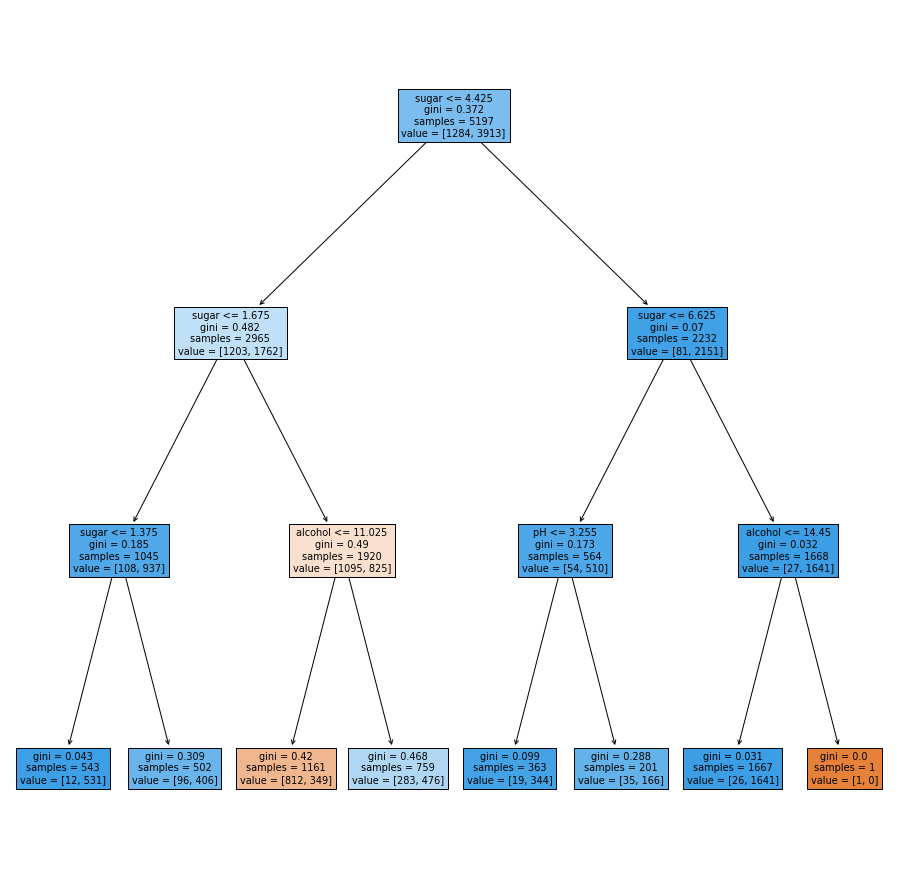

In [83]:
plt.figure(figsize=(16,16))
plot_tree(dt,filled=True, feature_names=['alcohol','sugar','pH'])
plt.show() #진한 파랑이 확률이 높은 상태

In [84]:
print(dt.feature_importances_) # sugar is important

[0.13019509 0.8647991  0.00500581]


교차 검정과 그리드 서치 p.242

In [85]:
sub_input,vel_input,sub_target,vel_target = train_test_split(train_input,train_target)

In [86]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_input,train_target)
print(dt.score(sub_input,sub_target))
print(dt.score(vel_input,vel_target))
print(dt.score(test_input,test_target))

0.8450089812676418
0.8338461538461538
0.8515384615384616


In [95]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.001,0.001,0.01,0.1,0.2]}
gs = GridSearchCV(DecisionTreeClassifier(),params)
gs.fit(train_input,train_target)
dt = gs.best_estimator_
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))
       

0.8689628631903021
0.8723076923076923


In [96]:
print(gs.best_params_)

{'min_impurity_decrease': 0.001}


In [97]:
print(gs.cv_results_['mean_test_score'])

[0.85318242 0.85318242 0.85087288 0.7529344  0.7529344 ]


In [101]:
params = {
    'min_impurity_decrease':[0.0001,0.001,0.01,0.1,0.2],
    'max_depth':range(5,20),
    'min_samples_split':range(2,100,10)
}

In [104]:
gs = GridSearchCV(DecisionTreeClassifier(),params)
gs.fit(train_input,train_target)
dt = gs.best_estimator_
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.9632480277082932
0.8730769230769231


In [105]:
print(gs.best_params_)

{'max_depth': 19, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}


## 트리 앙상블 p.263

In [106]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_validate(rf,train_input,train_target,return_train_score=True)
print(scores)

{'fit_time': array([0.63889527, 0.6367898 , 0.64437032, 0.58814096, 0.60995555]), 'score_time': array([0.07359242, 0.05247664, 0.05139875, 0.05064869, 0.05221987]), 'test_score': array([0.88557692, 0.89230769, 0.8960539 , 0.90375361, 0.88450433]), 'train_score': array([0.99879721, 0.99759442, 0.9983165 , 0.998076  , 0.998076  ])}


In [108]:
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.998172024609359 0.8924392907381357


In [110]:
rf.fit(train_input,train_target)
print(rf.feature_importances_)

[0.23526839 0.49505634 0.26967526]


In [111]:
print(rf.score(train_input,train_target))
print(rf.score(test_input,test_target))

0.9976909755628247
0.9023076923076923


# 군집 알고리즘 p.286